# Examen parcial de Aprendizaje de Máquina

## Nombre: Carlos Geovany Pérez Velázquez
### Matrícula: 000197614

### Problema 1
### Clasificación lineal

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
## Creamos nuestro dataset de entrenamiento
df = pd.DataFrame({'X1':[0,2,3,0,2,5,5,2,4,5], 
                   'X2':[0,0,0,2,2,1,2,4,4,5],
                   'Etiqueta':[-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0]})

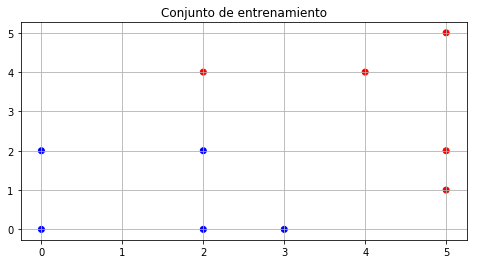

In [3]:
fig, ax = plt.subplots(figsize=(8,4))
colors = {-1.0: 'b', 1.0: 'r'}
plt.title("Conjunto de entrenamiento")
ax.scatter(df["X1"], df["X2"],  color=[colors[r] for r in df['Etiqueta']])
ax.grid(True)

In [4]:
def perceptron (data, n_iters):
    """
    Función que implementa el algoritmo Perceptron
    Args:
        data (dataframe): dataframe con los datos a evaluar
        n_iters (int): número de iteraciones a realizar
    Returns:
        theta (array): arreglo con los pesos resultantes de la evaluación
        errors_ (array): arreglo con los errores por cada iteración
    """
    labels = data.iloc[0:,2].values 
    X = data.iloc[0:, 0:2].values 
    errores = np.zeros(X.shape[0])
    theta = np.zeros(1 + X.shape[1])
    errors_ = []

    for _ in range(n_iters):
        errors = 0
        i = 0
        for xi, label in zip(X, labels):                        
            y = (theta[1:] @ xi) + theta[0]
            target = -1.0 if (y < 0) else 1
            update = label - target
            if update!=0:
                errors += 1
                errores[i] += 1
            theta[1:] +=  update * xi
            theta[0] += update
            i+=1
        errors_.append(errors)
        
    return theta, errors_, errores

In [5]:
n_iters = 20
theta,errors, errs = perceptron(df,n_iters)
## agregamos los errores de clasificación por cada punto al dataset
df['Errores'] = errs

In [6]:
## Trasnponemos el dataset
df.T

,0,1,2,3,4,5,6,7,8,9
X1,0.0,2.0,3.0,0.0,2.0,5.0,5.0,2.0,4.0,5.0
X2,0.0,0.0,0.0,2.0,2.0,1.0,2.0,4.0,4.0,5.0
Etiqueta,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0
Errores,2.0,12.0,12.0,2.0,3.0,14.0,0.0,0.0,0.0,0.0


In [7]:
## suma total de errores
df.Errores.sum()

45.0

1.1 ¿Cuál es el intercepto resultante $\theta_0$?

In [8]:
theta[0]

-34.0

1.2 ¿Cuál es el vector de parámetros $\theta$ resultante?

In [9]:
theta[1:]

array([8., 8.])

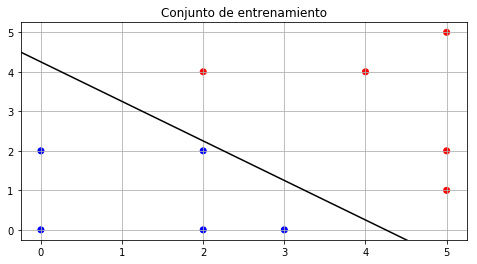

In [10]:
## Usamos la ecuación de la recta con el valor de theta resultante
m = -theta[0]/theta[2]
b = -theta[1]/theta[2]
x = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 200)
y = m + b * x

fig, ax = plt.subplots(figsize=(8,4))
colors = {-1.0: 'b', 1.0: 'r'}
line, = ax.plot([],[], 'k-')
plt.title("Conjunto de entrenamiento")
ax.scatter(df["X1"], df["X2"],  color=[colors[r] for r in df['Etiqueta']])
ax.grid(True)
line.set_data(x,y)

1.3 Los errores que comete el algoritmo a menudo dependen del orden en que se
consideraron los puntos. ¿Podría el punto (5,2) etiquetado +1 haber sido el primero
considerado para obtener los resultados de la tabla anterior? Si/No/Depende Justifique

**Depende. El número de errores por cada punto es el resultado de la clasificaón obtenida al multiplicar la $\theta$ actual por el vector de características. Conforme se va actualizando el valor de $\theta$ el algoritmo va aprendiendo a clasificar un nuevo punto. De tal manera que los errores de etiquetado de un punto, dependen del valor de la $\theta$ actual y de la iteración, más no de la posición en la que se está clasificando. Acontinuación se muestran dos pruebas, una donde el punto (5,2) es el primero y una donde los puntos están al azar ordenados.**

In [11]:
## Mezclamos el orden de las filas y volvemos a probar el algoritmo
df1 = df.sample(frac=1)
n_iters = 20
theta1,errors1, errs1 = perceptron(df1,n_iters)
df1['Errores'] = errs1
df1.T

,9,1,5,4,8,6,7,2,3,0
X1,5.0,2.0,5.0,2.0,4.0,5.0,2.0,3.0,0.0,0.0
X2,5.0,0.0,1.0,2.0,4.0,2.0,4.0,0.0,2.0,0.0
Etiqueta,1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
Errores,1.0,3.0,2.0,3.0,1.0,0.0,0.0,2.0,2.0,0.0


In [12]:
df1.Errores.sum()

14.0

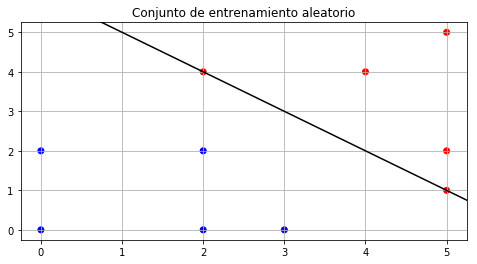

In [13]:
## Usamos la ecuación de la recta con el último valor de theta
m = -theta1[0]/theta1[2]
b = -theta1[1]/theta1[2]
x = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 200)
y = m + b * x

fig, ax = plt.subplots(figsize=(8,4))
colors = {-1.0: 'b', 1.0: 'r'}
line, = ax.plot([],[], 'k-')
plt.title("Conjunto de entrenamiento aleatorio")
ax.scatter(df["X1"], df["X2"],  color=[colors[r] for r in df['Etiqueta']])
ax.grid(True)
line.set_data(x,y)

In [14]:
## Definimos un nuevo df con el punto (5,2) en la primera posición
df2 = pd.DataFrame({'X1':[5,2,3,0,2,5,0,2,4,5], 
                   'X2':[2,0,0,2,2,1,0,4,4,5],
                   'Etiqueta':[1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,1.0]})
n_iters = 20
theta2,errors2, errs2 = perceptron(df2,n_iters)
df2['Errores'] = errs2
df2.T

,0,1,2,3,4,5,6,7,8,9
X1,5.0,2.0,3.0,0.0,2.0,5.0,0.0,2.0,4.0,5.0
X2,2.0,0.0,0.0,2.0,2.0,1.0,0.0,4.0,4.0,5.0
Etiqueta,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,1.0
Errores,0.0,4.0,2.0,1.0,0.0,3.0,1.0,0.0,0.0,0.0


In [15]:
df2.Errores.sum()

11.0

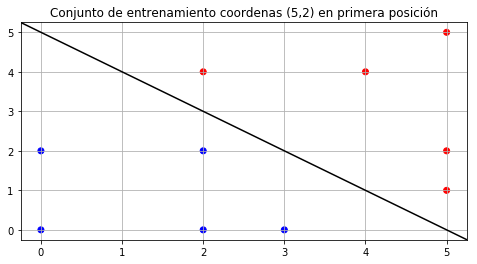

In [16]:
## Usamos la ecuación de la recta con el último valor de theta
m = -theta2[0]/theta2[2]
b = -theta2[1]/theta2[2]
x = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 200)
y = m + b * x

fig, ax = plt.subplots(figsize=(8,4))
colors = {-1.0: 'b', 1.0: 'r'}
line, = ax.plot([],[], 'k-')
plt.title("Conjunto de entrenamiento coordenas (5,2) en primera posición")
ax.scatter(df["X1"], df["X2"],  color=[colors[r] for r in df['Etiqueta']])
ax.grid(True)
line.set_data(x,y)

In [17]:
##Función de costo basada en el código visto en clase
def cost(theta, X, y):
    sigmoid = lambda x : 1/(1+np.exp(-x))
    h = sigmoid(np.dot(X, theta))
    c = (-y)*np.log(h) - (1-y)*np.log(1-h)
    return c.mean()

## Función de descenso por gradiente SVM para obtener el separdaor lineal de margen ancho
def gradient_descent(data, n_iters, lambda_, eta):

    labels = data.iloc[0:,2].values 
    X = data.iloc[0:, 0:2].values 
    theta = np.zeros(1 + X.shape[1])
    n = X.shape[0]
    i = 0
    j_theta = 0
    j_theta_ant = 1
        
    while abs(j_theta - j_theta_ant ) > 0.0001 and i < n_iters:
        res_theta = np.zeros(1 + X.shape[1])
        sum_res = 0
        j_theta_ant = j_theta
        for xi, label in zip(X,labels):   
            costo = cost(theta[1:], xi, label)             
            target = label * (theta[1:] @ xi + theta[0])
            if  target < 1:
                res_theta[1:] += -1 * label  * xi + (lambda_ * theta[1:])
                res_theta[0] += -1 * label
                sum_res += 1 - target
            else:
                res_theta[1:] += lambda_ * theta[1:]
                res_theta[0] += 0
                sum_res += 0
        theta[1:] = theta[1:] - eta * (1/n) * res_theta[1:]
        theta[0] = theta[0] - eta * (1/n) * res_theta[0]
        j_theta = (1/n) * sum_res + (lambda_ / 2) * np.linalg.norm(theta[1:],2)
        i += 1
    print(f"Iter: {i} | Costo: {costo} | Gradiente: {theta[1:]}")
    return theta

In [18]:
n_iters = 10000
lambda_= 0.0005
eta = 0.1
thetaGD = gradient_descent(df,n_iters,lambda_, eta)

Iter: 302 | Costo: 0.0006632307102731206 | Gradiente: [0.7120596  0.71147842]


1.4 ¿Cuáles son los parámetros $\theta_0$ y $\theta$ correspondientes al separador de margen máximo?

In [19]:
print(f"Theta_0: {thetaGD[0]}\nTheta: {thetaGD[1:]}")

Theta_0: -3.359999999999997
Theta: [0.7120596  0.71147842]


1.5 ¿Cuál es el valor del margen alcanzado (distancia del margen al hiperplano)?

**La distancia del margen de desición al hiperplano está dada por $\frac{1}{||\theta||}$**

In [20]:
1/abs(thetaGD[1:])

array([1.40437682, 1.405524  ])

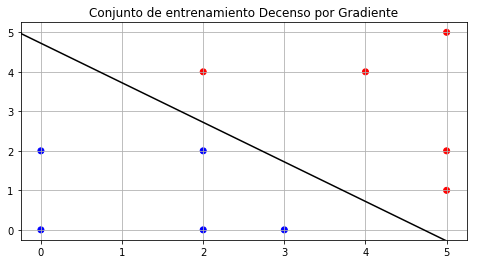

In [21]:
## Usamos la ecuación de la recta con el último valor de theta
m = -thetaGD[0]/thetaGD[2]
b = -thetaGD[1]/thetaGD[2]
x = np.linspace(ax.get_xlim()[0], ax.get_xlim()[1], 200)
y = m + b * x

fig, ax = plt.subplots(figsize=(8,4))
colors = {-1.0: 'b', 1.0: 'r'}
line, = ax.plot([],[], 'k-')
plt.title("Conjunto de entrenamiento Decenso por Gradiente")
ax.scatter(df["X1"], df["X2"],  color=[colors[r] for r in df['Etiqueta']])
ax.grid(True)
line.set_data(x,y)

1.6 Usando los parámetros $\theta_0$ y $\theta$ correspondientes al separador de margen máximo, ¿cuál es
la suma de los Hinge Losses evaluadas en cada ejemplo?

In [22]:
Y = df.iloc[0:,2].values 
X = df.iloc[0:, 0:2].values
costos = []
for xi, y in zip(X,Y):
    z = y*(thetaGD[1:]@xi+thetaGD[0])
    costos.append( 0 if z >= 1 else 1-z )
costos = np.round(costos,decimals=4)
df['Costos']= costos
df.T

,0,1,2,3,4,5,6,7,8,9
X1,0.0,2.0,3.0,0.0,2.0000,5.0000,5.0,2.00,4.0,5.0
X2,0.0,0.0,0.0,2.0,2.0000,1.0000,2.0,4.00,4.0,5.0
Etiqueta,-1.0,-1.0,-1.0,-1.0,-1.0000,1.0000,1.0,1.00,1.0,1.0
Errores,2.0,12.0,12.0,2.0,3.0000,14.0000,0.0,0.00,0.0,0.0
Costos,0.0,0.0,0.0,0.0,0.4871,0.0882,0.0,0.09,0.0,0.0


In [23]:
## Suma de los Hinge losses para cada punto
df.Costos.sum()

0.6652999999999999

1.7 Supongamos que modificamos un poco la solución de margen máximo y dividimos $\theta_0$ y $\theta$
entre 2. ¿Cuál es la suma de las pérdidas de los Hinge Losses en cada ejemplo para este nuevo
separador?

In [24]:
Y = df.iloc[0:,2].values 
X = df.iloc[0:, 0:2].values
costos = []
thetaGD = thetaGD/2  ## Dividimos theta0 y theta entre 2
for xi, y in zip(X,Y):
    z = y*(thetaGD[1:]@xi+thetaGD[0])
    costos.append( 0 if z >= 1 else 1-z )
costos = np.round(costos,decimals=4)
df['Costos']= costos
df.T

,0,1,2,3,4,5,6,7,8,9
X1,0.0,2.0000,3.0000,0.0000,2.0000,5.0000,5.0000,2.000,4.0,5.0
X2,0.0,0.0000,0.0000,2.0000,2.0000,1.0000,2.0000,4.000,4.0,5.0
Etiqueta,-1.0,-1.0000,-1.0000,-1.0000,-1.0000,1.0000,1.0000,1.000,1.0,1.0
Errores,2.0,12.0000,12.0000,2.0000,3.0000,14.0000,0.0000,0.000,0.0,0.0
Costos,0.0,0.0321,0.3881,0.0315,0.7435,0.5441,0.1884,0.545,0.0,0.0


In [25]:
## Suma de los Hinge losses para cada punto
df.Costos.sum()

2.4726999999999997

### Problema 2
### Métodos de Kernel

In [26]:
## Creamos nuestro dataset de entrenamiento
df1 = pd.DataFrame({'X1':[0,2,1,0,3,4,5,1,4,5], 
                   'X2':[0,0,1,2,3,1,2,4,4,5],
                   'Etiqueta':[-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0]})

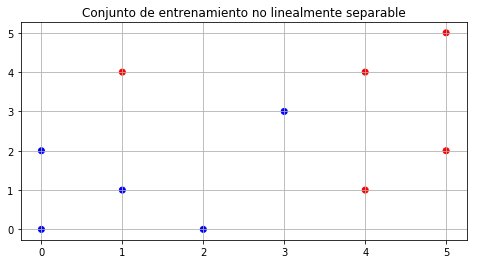

In [27]:
fig, ax = plt.subplots(figsize=(8,4))
colors = {-1.0: 'b', 1.0: 'r'}
plt.title("Conjunto de entrenamiento no linealmente separable")
ax.scatter(df1["X1"], df1["X2"],  color=[colors[r] for r in df1['Etiqueta']])
ax.grid(True)

In [28]:
n_iters = 200
theta1,errors1, errs1 = perceptron(df1,n_iters)
## agregamos los errores de clasificación por cada punto al dataset
df1['Errores'] = errs
df1.T

,0,1,2,3,4,5,6,7,8,9
X1,0.0,2.0,1.0,0.0,3.0,4.0,5.0,1.0,4.0,5.0
X2,0.0,0.0,1.0,2.0,3.0,1.0,2.0,4.0,4.0,5.0
Etiqueta,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0
Errores,2.0,12.0,12.0,2.0,3.0,14.0,0.0,0.0,0.0,0.0


2.1 Si nuevamente utilizamos el algoritmo de perceptrón lineal para entrenar al clasificador,
¿qué sucederá (seleccione una de las siguientes opciones y explique su respuesta)?
Nota: En las siguientes opciones, "converger" significa que, dada una determinada entrada, el
algoritmo terminará con una salida fija dentro de pasos finitos (suponga que T es muy grande:
la salida del algoritmo no cambiará a medida que aumentemos T). De lo contrario, digamos
que el algoritmo diverge (incluso para una T extremadamente grande, la salida del algoritmo
cambiará a medida que aumentemos más la T).

**b) El algoritmo siempre converge y obtenemos un clasificador que no clasifica perfectamente el conjunto de datos de entrenamiento. El algoritmo no puede clasificar corectamente todo el conjunto de datos de entrenamiento porque no es linealmente clasificable. Converge porque aun con una T muy grande, la salida no cambia en cierto punto sin importar la secuencia en que recibe los datos**

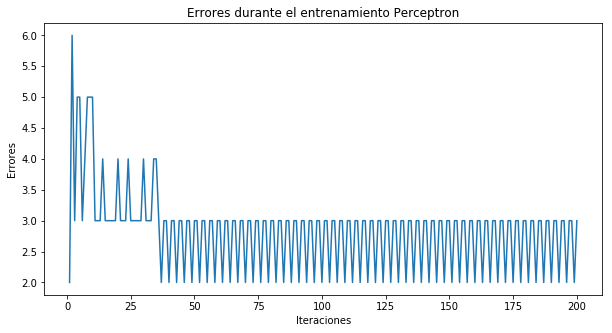

In [29]:
plt.figure(figsize=(10,5)) 
plt.plot(np.arange(1, n_iters+1), errors1)
plt.xlabel('Iteraciones')
plt.ylabel('Errores')
plt.title("Errores durante el entrenamiento Perceptron")
plt.show()

In [30]:
def Kperceptron (data, n_iters):
    """
    Función que implementa el algoritmo KernelPerceptron
    Args:
        data (dataframe): dataframe con los datos a evaluar
        n_iters (int): número de iteraciones a realizar
    Returns:
        alpha: (array): numero de errores por punto en los datos de entrenamiento
    """
    labels = data.iloc[0:,2].values 
    X = data.iloc[0:, 0:2].values 
    theta = np.zeros(1 + X.shape[1])
    alpha = np.zeros(X.shape[0])
    n_samples = X.shape[0]
    K = np.zeros((n_samples, n_samples))
    
    ##kernel cuadrático
    kernel = lambda x,z: (1 + np.dot(x, z))**2
    
    for i in range(n_samples):
        for j in range(n_samples):
            K[i,j] = kernel(X[i], X[j]) ## Generamos una matriz con los productos punto
           
    for _ in range(n_iters):
        for i in range(n_samples):
            target = np.sign(np.sum(K[:,i] * alpha * labels)) ## La función np.sign regresa -1 si x < 0, 0 si x==0, 1 si x > 0
            update = labels[i] - target
            theta[1:] +=  update * X[:][i]
            theta[0] += update
            if target != labels[i]: 
                alpha[i] += 1
    return theta, alpha

In [31]:
thetaK, a = Kperceptron(df1,10000)
##a son los errores de clasificación por cada punto del conjunto de entrenamiento
df1['alpha'] = a
df1.T

,0,1,2,3,4,5,6,7,8,9
X1,0.0,2.0,1.0,0.0,3.0,4.0,5.0,1.0,4.0,5.0
X2,0.0,0.0,1.0,2.0,3.0,1.0,2.0,4.0,4.0,5.0
Etiqueta,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0
Errores,2.0,12.0,12.0,2.0,3.0,14.0,0.0,0.0,0.0,0.0
alpha,2.0,23.0,6.0,18.0,17.0,13.0,1.0,13.0,2.0,0.0


2.2 Según la tabla, ¿cuál es la salida de $\theta_0$ y $\theta$?

In [32]:
print(f"Theta0: {thetaK[0]}\nTheta: {thetaK[1:]}")

Theta0: -73.0
Theta: [-54. -40.]


2.4 Para $x = [x_1, x_2]^T$ definimos la función del kernel como $K(x, x') = \phi(x)^T\phi(x')$. Escriba $K(x, x')$ como una función del producto punto de $x\cdot x'$. Para contestar, asuma que $z = x \cdot x'$. Defina el resultado en términos de $z$

**$K(x, x') = x\cdot x' = z = 1+x_1x'_1+x_2x'_2+x_1^2 x_1'^2+x_2^2x_2'^2+x_1x'_1x_2x'_2 = e^{(-\gamma||x-x'||^2)}$**

### Problema 3
### Descenso por gradiente

3.1 Encuentre $\nabla_\theta Loss_h (\;y\;\theta \cdot \;x)$ en términos de $x$

**$\frac{\partial Loss_h}{\partial x} = \frac{1}{n} - \sum_{i=1}^{n} \; Loss_h(\;y\;\theta \cdot \;x) \; y^{(i)}$**

$Loss_h(v)\begin{cases}
        1-v & \text{si $v<1$,}\\
        0 & \text{de otra manera.}
    \end{cases}$
 
$Loss_h(v)\begin{cases}
        -1 & \text{si $v<1$,}\\
        0 & \text{de otra manera.}
    \end{cases}$


3.2 Si $\theta$ contiene los parámetros actuales. ¿Cuál es la regla de actualización de gradiente
estocástico, donde $\eta > 0$ es la tasa de aprendizaje? (Elija todas las opciones que correspondan)

**b) $\theta - \eta \nabla_\theta[Loss_h(y^{(i)}\theta \cdot x^{(i)})] - \eta \lambda \theta$ para $x^{(i)}$ aleatorias con etiqueta $y^{(i)}$**

**d) $\theta - \eta \nabla_\theta[Loss_h(y^{(i)}\theta \cdot x^{(i)})] - \eta \nabla_\theta [\frac{\lambda}{2}||\theta||^2]$ para $x^{(i)}$ aleatorias con etiqueta $y^{(i)}$**

**e) $\theta - \eta \sum_{i=1}^n \nabla_\theta[Loss_h(y^{(i)}\theta \cdot x^{(i)})] - \eta \nabla_\theta [\frac{\lambda}{2}||\theta||^2]$ para $x^{(i)}$ aleatorias con etiqueta $y^{(i)}$**

3.3
**R. e**

3.4
**R. c**

### Problema 4

¿Cuál de las siguientes afirmaciones es correcta?

4.1 El gradiente calculado en el algoritmo de retropropagación consiste en las derivadas
parciales de la función de pérdida con respecto a cada peso de red. Verdadero / Falso
Justifique.

**Falso. El gradiente calculado por el algoritmo de retropropagación consiste en las derivadas parciales de la función de pérdida con respecto a el peso $w$ de la capa $l$ que conecta al elemento $i$ esimo de la capa $l - 1$ con el $j$ esimo elemento de la capa $l$. $$w^l_{ij} \leftarrow w^l_{ij} - \eta \left[ \frac{\partial Loss(y, f(x;w))}{\partial w^l_{ij}} \right]$$**

4.2 El descenso de gradiente estocástico difiere del (verdadero) descenso de gradiente en
actualizar solo un peso de la red durante cada paso de descenso de gradiente. Verdadero /
Falso Justifique.

**Falso. La diferencia entre descenso por gradiente y descenso por gradiente estocastico radica en que en descenso por gradiente iteramos sobre el total de las observaciones del conjunto de entrenamiento para actualizar un parámetro, en este caso los pesos de la red. Por otro lado, en descenso por gradiente estocastico podemos usar una sola observación o un subset del conjunto de entrenamiento para actualizar los pesos de lared en una sola iteración**

4.3 Lo más importante en aprendizaje de máquina es clasificar de manera correcta el conjunto
de datos de entrenamiento, Verdadero / Falso Justifique.

**Falso. Al intentar clasificar correctamento todas las observaciones del conjunto de entrenamiento podemos caer en sobreentrenar al modelo, perdiendo posibilidades de generalizar el modelo fuera de la muestra.**


### Problema 5

5.1 Explique en que consiste la maldición de la dimensionalidad   
**En la medida en que se aumenta el número de dimensiones o atributos, se requiere de un número mayor exponencialmente de observaciones para poder llevar a cabo la clasificación. A partir de cierto punto, entre más variables se tienen, se disminuye el desempeño de un modelo clasificador.**

5.2 ¿Cuál es la función de regresión y que minimiza?   
**La funciónde regresión $x \rightarrow f(x) : = E[Y|X = x] = \int y h(y|x) dy $ minimiza $E[(Y - g(x))^2 | X = x]$ sobre todas las funciones $g(x)$ en los puntos $X = x$. Esto es, minimiza la esperanza de $Y$ con respecto a $g(x)$, la esperanza de la distancia cuadrada entre los valores reales y el promedio del valor esperado de $Y|X=x$**

5.3 Explica en que consiste el trade-off entre sesgo y varianza    
**Dado un conjunto de hipótesis $H$, buscamos encontrar la función $f$ que mejor minimice el error cuadrado medio $E_{out}$. El sesgo es que tan bien puede mi conjunto de hipótesis $H$ puede aproximarse a $f$ y la varianza es que tan bien podemos acercarnos a una $h \in H$. El trade off entre sesgo y varianza es la relación que se da entre aproximación y generalización, conforme aumenta el tamaño del conjunto de hipótesis posibles $H$, se reduce el sesgo pero se aumenta la varianza, por el contrario, si se baja la complejidad de la hipótesis aumenta el sesgo pero se reduce la varianza.**